In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("shortcolumsdatest.csv")
df

Age  Gender                                         University  \
0     18-22  Female           Independent University, Bangladesh (IUB)   
1     18-22    Male           Independent University, Bangladesh (IUB)   
2     18-22    Male  American International University Bangladesh (...   
3     18-22    Male  American International University Bangladesh (...   
4     18-22    Male                       North South University (NSU)   
...     ...     ...                                                ...   
9995  18-22  Female           Bangladesh Agricultural University (BAU)   
9996  27-30    Male  Bangladesh University of Engineering and Techn...   
9997  23-26  Female           Independent University, Bangladesh (IUB)   
9998  23-26    Male                              Dhaka University (DU)   
9999  23-26    Male                              Dhaka University (DU)   

                                        Department              Academic_Year  \
0     Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
1     Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
2     Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
3     Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
4     Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   
...                                            ...                        ...   
9995  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
9996  Engineering - CS / CSE / CSC / Similar to CS   First Year or Equivalent   
9997  Engineering - CS / CSE / CSC / Similar to CS   Third Year or Equivalent   
9998                                         Other   Third Year or Equivalent   
9999                           Biological Sciences  Fourth Year or Equivalent   

     Current_CGPA                                        Scholarship  \
0     2.50 - 2.99                                                 No   
1     3.00 - 3.39                                                 No   
2     3.00 - 3.39                                                 No   
3     3.00 - 3.39                                                 No   
4     2.50 - 2.99                                                 No   
...           ...                                                ...   
9995  3.40 - 3.79                                                Yes   
9996  3.00 - 3.39                                                 No   
9997  3.00 - 3.39                                                 No   
9998  3.00 - 3.39                                                 No   
9999  3.00 - 3.39  7. Did you receive a waiver or scholarship at ...   

        Upset_Academic No_Control_Academic Nervous_Stress_Academic  ...  \
0     3 - Fairly Often      4 - Very Often        3 - Fairly Often  ...   
1     3 - Fairly Often    3 - Fairly Often          4 - Very Often  ...   
2            0 - Never           0 - Never               0 - Never  ...   
3     3 - Fairly Often    1 - Almost Never           2 - Sometimes  ...   
4       4 - Very Often      4 - Very Often          4 - Very Often  ...   
...                ...                 ...                     ...  ...   
9995  1 - Almost Never       2 - Sometimes        1 - Almost Never  ...   
9996     2 - Sometimes       2 - Sometimes           2 - Sometimes  ...   
9997     2 - Sometimes    3 - Fairly Often          4 - Very Often  ...   
9998         0 - Never           0 - Never               0 - Never  ...   
9999  3 - Fairly Often    3 - Fairly Often           2 - Sometimes  ...   

                  Afraid_Academic  \
0     2 - More than half the days   
1     2 - More than half the days   
2                  0 - Not at all   
3     2 - More than half the days   
4            3 - Nearly every day   
...                           ...   
9995             1 - Several days   
9996             1 - Several days   
9997         3 - Nearly every day   
9998  2 - 

In [6]:
# Define the stress-related columns
stress_columns = [
    "Nervous_Anxiety", "Excessive_Worry", "Depressed", "Sleep_Issue", 
    "Low_Energy", "Suicidal_Thoughts", "Concentration_Issue", "Appetite_Issue", 
    "Afraid_Academic"
]

# Define mapping of responses to numerical values
response_mapping = {
    "0 - Not at all": 0,
    "1 - Several days": 1,
    "2 - More than half the days": 2,
    "3 - Nearly every day": 3
}

# Convert responses to numerical scores
for col in stress_columns:
    df[col] = df[col].map(response_mapping)

# Compute total stress score
df["Total_Stress_Score"] = df[stress_columns].sum(axis=1)

# Define stress level based on thresholds
def classify_stress_level(score):
    if score <= 9:
        return "Low Stress"
    elif score <= 18:
        return "Moderate Stress"
    else:
        return "High Stress"

df["Stress_Level"] = df["Total_Stress_Score"].apply(classify_stress_level)

# Display the first few rows with the new target variable
print(df[["Total_Stress_Score", "Stress_Level"]].head())

# Save the updated dataset (Optional)
df.to_csv("updated_dataset.csv", index=False)

   Total_Stress_Score     Stress_Level
0                17.0  Moderate Stress
1                15.0  Moderate Stress
2                 0.0       Low Stress
3                13.0  Moderate Stress
4                20.0      High Stress


In [8]:
df.head(1)

Age  Gender                                University  \
0  18-22  Female  Independent University, Bangladesh (IUB)   

                                     Department              Academic_Year  \
0  Engineering - CS / CSE / CSC / Similar to CS  Second Year or Equivalent   

  Current_CGPA Scholarship    Upset_Academic No_Control_Academic  \
0  2.50 - 2.99          No  3 - Fairly Often      4 - Very Often   

  Nervous_Stress_Academic  ... Depressed Sleep_Issue Low_Energy  \
0        3 - Fairly Often  ...       2.0         3.0        2.0   

  Appetite_Issue               Low_SelfEsteem Concentration_Issue  \
0            2.0  2 - More than half the days                 2.0   

           Motor_Change  Suicidal_Thoughts Total_Stress_Score     Stress_Level  
0  3 - Nearly every day                2.0               17.0  Moderate Stress  

[1 rows x 35 columns]

In [10]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
print("Missing Values per Column:\n", missing_values[missing_values > 0])

Missing Values per Column:
 Nervous_Anxiety        6312
Excessive_Worry         191
Afraid_Academic         175
Depressed               166
Sleep_Issue             183
Low_Energy              176
Appetite_Issue          176
Concentration_Issue     163
Suicidal_Thoughts       158
dtype: int64


In [12]:
# Fill numerical columns with median
df.fillna(df.median(numeric_only=True), inplace=True)

# Fill categorical columns with most frequent value (mode)
df.fillna(df.mode().iloc[0], inplace=True)

In [14]:
# Confirm missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum().sum())  # Should be 0


Missing Values After Handling:
 0


In [18]:
df["Nervous_Anxiety"]

0       3.0
1       3.0
2       0.0
3       3.0
4       3.0
       ... 
9995    3.0
9996    3.0
9997    3.0
9998    0.0
9999    3.0
Name: Nervous_Anxiety, Length: 10000, dtype: float64

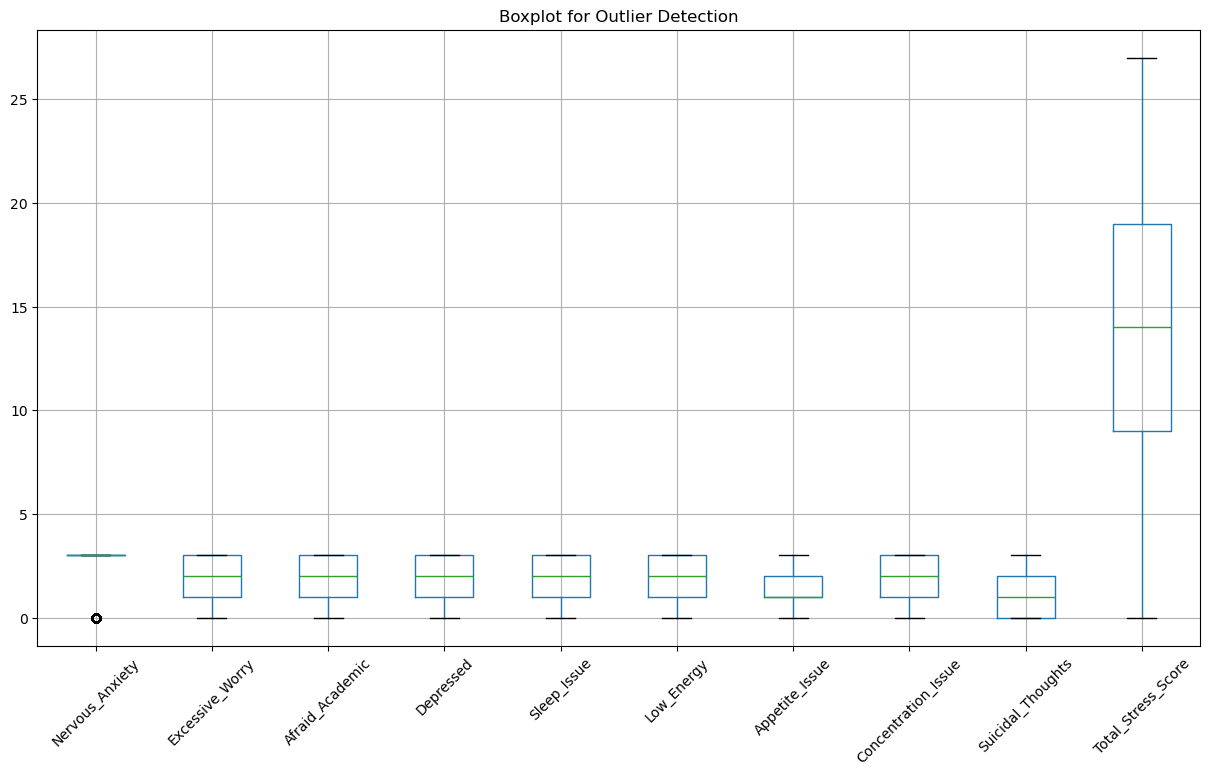

In [42]:
import matplotlib.pyplot as plt
# Define numerical columns (excluding categorical columns)
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot boxplots to visualize outliers
plt.figure(figsize=(15, 8))
df[numerical_columns].boxplot(rot=45)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [44]:
 #Detect outliers using IQR method
Q1 = df[numerical_columns].quantile(0.25)  # First quartile (25%)
Q3 = df[numerical_columns].quantile(0.75)  # Third quartile (75%)
IQR = Q3 - Q1  # Interquartile Range

In [46]:
# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [48]:
# Identify outliers
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).sum()
print("\nNumber of Outliers per Column:\n", outliers)


Number of Outliers per Column:
 Nervous_Anxiety        989
Excessive_Worry          0
Afraid_Academic          0
Depressed                0
Sleep_Issue              0
Low_Energy               0
Appetite_Issue           0
Concentration_Issue      0
Suicidal_Thoughts        0
Total_Stress_Score       0
dtype: int64


In [50]:
 #Option 1: Remove outliers (only if necessary)
df_cleaned = df[~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)]

In [52]:
# Identify outliers
outliers = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).sum()
print("\nNumber of Outliers per Column:\n", outliers)


Number of Outliers per Column:
 Nervous_Anxiety        989
Excessive_Worry          0
Afraid_Academic          0
Depressed                0
Sleep_Issue              0
Low_Energy               0
Appetite_Issue           0
Concentration_Issue      0
Suicidal_Thoughts        0
Total_Stress_Score       0
dtype: int64


In [54]:
Q1 = df['Nervous_Anxiety'].quantile(0.25)
Q3 = df['Nervous_Anxiety'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Nervous_Anxiety'] >= lower_bound) & (df['Nervous_Anxiety'] <= upper_bound)]


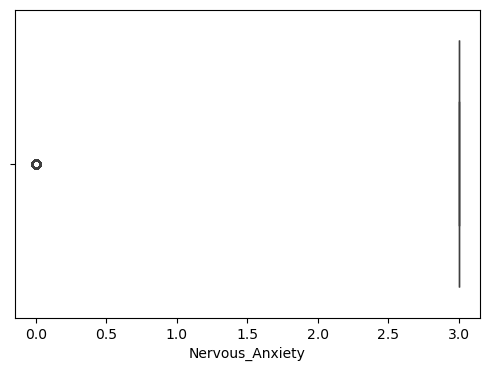

In [58]:
# Plot boxplot again to check for remaining outliers
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Nervous_Anxiety'])
plt.show()


In [148]:
df['Nervous_Anxiety'].describe()


count    10000.000000
mean         2.703300
std          0.895628
min          0.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          3.000000
Name: Nervous_Anxiety, dtype: float64

In [150]:
df_cleaned = df[df['Nervous_Anxiety'] != 0]  # Remove rows where the value is 0


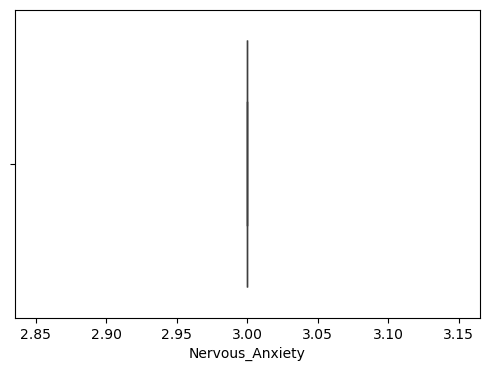

In [152]:
# Check descriptive statistics after handling outliers
df_cleaned['Nervous_Anxiety'].describe()

# Plot boxplot to see if outliers have been removed
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned['Nervous_Anxiety'])
plt.show()


In [154]:
df_cleaned['Nervous_Anxiety'].describe()

count    9011.0
mean        3.0
std         0.0
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         3.0
Name: Nervous_Anxiety, dtype: float64

In [156]:
# Summary Statistics:
df_cleaned.describe()


Age       Gender   University   Department  Academic_Year  \
count  9011.000000  9011.000000  9011.000000  9011.000000    9011.000000   
mean      1.472090     1.671513     6.889468     3.753302       2.951060   
std       0.776438     0.554837     3.910399     2.260371       1.655094   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000     1.000000     3.000000     3.000000       1.000000   
50%       1.000000     2.000000     9.000000     3.000000       3.000000   
75%       2.000000     2.000000    10.000000     3.000000       5.000000   
max       5.000000     3.000000    15.000000    12.000000       5.000000   

       Current_CGPA  Scholarship  Upset_Academic  No_Control_Academic  \
count   9011.000000  9011.000000     9011.000000          9011.000000   
mean       1.979581     1.193319        3.238264             2.856398   
std        1.733532     0.456454        1.454659             1.559909   
min        0.000000     0.000000        0.000000             0.000000   
25%        1.000000     1.000000        3.000000             2.000000   
50%        2.000000     1.000000        3.000000             2.000000   
75%        3.000000     1.000000        4.000000             4.000000   
max        6.000000     2.000000        5.000000             5.000000   

       Nervous_Stress_Academic  ...    Depressed  Sleep_Issue   Low_Energy  \
count              9011.000000  ...  9011.000000  9011.000000  9011.000000   
mean                  3.133393  ...     1.878482     1.724781     2.014871   
std                   1.498118  ...     0.985575     1.028207     0.933173   
min                   0.000000  ...     0.000000     0.000000     0.000000   
25%                   2.000000  ...     1.000000     1.000000     1.000000   
50%                   3.000000  ...     2.000000     2.000000     2.000000   
75%                   5.000000  ...     3.000000     3.000000     3.000000   
max                   5.000000  ...     3.000000     3.000000     3.000000   

       Appetite_Issue  Low_SelfEsteem  Concentration_Issue  Motor_Change  \
count     9011.000000     9011.000000          9011.000000   9011.000000   
mean         1.565642        1.890911             1.722783      1.561425   
std          1.024230        1.067103             0.997639      1.061941   
min          0.000000        0.000000             0.000000      0.000000   
25%          1.000000        1.000000             1.000000      1.000000   
50%          1.000000        2.000000             2.000000      1.000000   
75%          2.000000        3.000000             3.000000      2.000000   
max          3.000000        4.000000             3.000000      4.000000   

       Suicidal_Thoughts  Total_Stress_Score  Stress_Level  
count        9011.000000         9011.000000   9011.000000  
mean            1.249473           14.604150      1.179114  
std             1.126573            6.270016      0.849424  
min             0.000000            0.000000      0.000000  
25%             0.000000           10.000000      0.000000  
50%             1.000000           14.000000      1.000000  
75%             2.000000           19.000000      2.000000  
max             3.000000           27.000000      2.000000  

[8 rows x 34 columns]

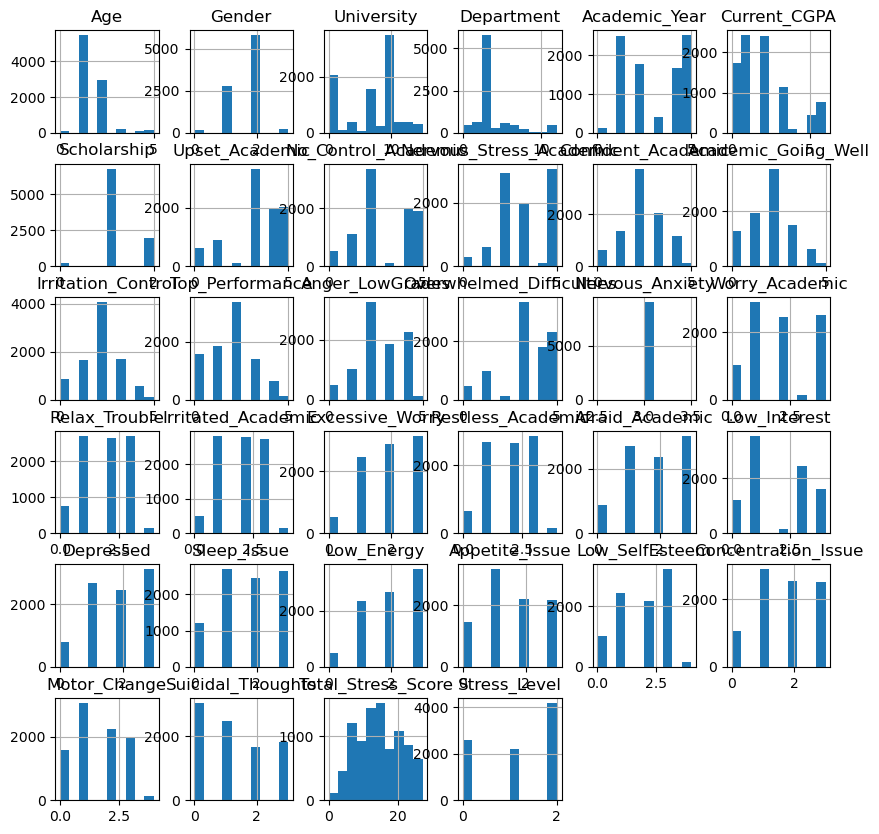

In [158]:
# Histograms/Boxplots: Plot histograms and boxplots for each feature to visualize distributions and identify outliers.
df_cleaned.hist(figsize=(10, 10))
plt.show()

In [170]:
#Pairplots: This will show relationships between pairs of features.
sns.pairplot(df_cleaned)
plt.show()


In [160]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = [
    'Age', 'Gender', 'University', 'Department', 
    'Academic_Year', 'Current_CGPA', 'Scholarship', 
    'Upset_Academic', 'No_Control_Academic', 'Nervous_Stress_Academic','Cope_Academic', 
    'Confident_Academic', 'Academic_Going_Well', 'Irritation_Control', 
    'Top_Performance', 'Anger_LowGrades', 'Overwhelmed_Difficulties', 
    'Worry_Academic', 'Relax_Trouble', 'Irritated_Academic', 
    'Restless_Academic', 'Low_Interest', 'Low_SelfEsteem', 
    'Motor_Change', 'Stress_Level'
]
# Apply label encoding to each categorical column
for column in categorical_columns:
    df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])

# Save the updated dataset to a new CSV file
df_cleaned.to_csv('updated_dataset_encoded.csv', index=False)

print(df_cleaned.head())


   Age  Gender  University  Department  Academic_Year  Current_CGPA  \
0    1       1           9           3              4             0   
1    1       2           9           3              5             1   
3    1       2           1           3              5             1   
4    1       2          11           3              4             0   
8    1       2           1           3              1             2   

   Scholarship  Upset_Academic  No_Control_Academic  Nervous_Stress_Academic  \
0            1               4                    5                        3   
1            1               4                    4                        5   
3            1               4                    1                        2   
4            1               5                    5                        5   
8            1               3                    4                        2   

   ...  Depressed  Sleep_Issue  Low_Energy  Appetite_Issue  Low_SelfEsteem  \
0  ...        

C:\Users\hp\AppData\Local\Temp\ipykernel_20024\1109233291.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])
C:\Users\hp\AppData\Local\Temp\ipykernel_20024\1109233291.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column] = label_encoder.fit_transform(df_cleaned[column])
C:\Users\hp\AppData\Local\Temp\ipykernel_20024\1109233291.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [162]:
from sklearn.ensemble import RandomForestClassifier
X = df_cleaned.drop('Total_Stress_Score', axis=1)  # Exclude target variable
y = df_cleaned['Total_Stress_Score']

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


                     Feature  Importance
33              Stress_Level    0.062245
32         Suicidal_Thoughts    0.043321
28            Appetite_Issue    0.041265
26               Sleep_Issue    0.039716
25                 Depressed    0.037828
23           Afraid_Academic    0.037159
2                 University    0.036831
30       Concentration_Issue    0.036670
27                Low_Energy    0.035060
21           Excessive_Worry    0.034459
5               Current_CGPA    0.033816
14           Top_Performance    0.030787
4              Academic_Year    0.029979
12       Academic_Going_Well    0.029428
13        Irritation_Control    0.028337
11        Confident_Academic    0.027940
7             Upset_Academic    0.027717
8        No_Control_Academic    0.027249
10             Cope_Academic    0.027176
15           Anger_LowGrades    0.026990
3                 Department    0.026966
31              Motor_Change    0.026828
24              Low_Interest    0.026693
16  Overwhelmed_

In [163]:
df_cleaned['Academic_Stress'] = df_cleaned['Upset_Academic'] + df_cleaned['No_Control_Academic'] + df_cleaned['Anger_LowGrades']


C:\Users\hp\AppData\Local\Temp\ipykernel_20024\2543115493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Academic_Stress'] = df_cleaned['Upset_Academic'] + df_cleaned['No_Control_Academic'] + df_cleaned['Anger_LowGrades']


In [164]:
#feature engeneering 
df_cleaned['CGPA_Stress_Interaction'] = df_cleaned['Current_CGPA'] * df_cleaned['Academic_Stress']


C:\Users\hp\AppData\Local\Temp\ipykernel_20024\1969370411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['CGPA_Stress_Interaction'] = df_cleaned['Current_CGPA'] * df_cleaned['Academic_Stress']


In [165]:
df_cleaned['Stress_Behavior'] = df_cleaned['Appetite_Issue'] + df_cleaned['Sleep_Issue'] + df_cleaned['Nervous_Anxiety']


C:\Users\hp\AppData\Local\Temp\ipykernel_20024\321309061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Stress_Behavior'] = df_cleaned['Appetite_Issue'] + df_cleaned['Sleep_Issue'] + df_cleaned['Nervous_Anxiety']


In [166]:
df_cleaned['Gender_Stress_Interaction'] = df_cleaned['Gender'] * df_cleaned['Stress_Behavior']


C:\Users\hp\AppData\Local\Temp\ipykernel_20024\702191160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Gender_Stress_Interaction'] = df_cleaned['Gender'] * df_cleaned['Stress_Behavior']


In [167]:
df_cleaned.head()

Age  Gender  University  Department  Academic_Year  Current_CGPA  \
0    1       1           9           3              4             0   
1    1       2           9           3              5             1   
3    1       2           1           3              5             1   
4    1       2          11           3              4             0   
8    1       2           1           3              1             2   

   Scholarship  Upset_Academic  No_Control_Academic  Nervous_Stress_Academic  \
0            1               4                    5                        3   
1            1               4                    4                        5   
3            1               4                    1                        2   
4            1               5                    5                        5   
8            1               3                    4                        2   

   ...  Low_SelfEsteem  Concentration_Issue  Motor_Change  Suicidal_Thoughts  \
0  ...               2                  2.0             3                2.0   
1  ...               2                  2.0             2                2.0   
3  ...               1                  2.0             2                1.0   
4  ...               3                  0.0             3                3.0   
8  ...               3                  2.0             1                2.0   

   Total_Stress_Score  Stress_Level  Academic_Stress  CGPA_Stress_Interaction  \
0                17.0             2               13                        0   
1                15.0             2               10                       10   
3                13.0             2                8                        8   
4                20.0             0               14                        0   
8                17.0             2               10                       20   

   Stress_Behavior  Gender_Stress_Interaction  
0              8.0                        8.0  
1              7.0                       14.0  
3              7.0                       14.0  
4              7.0                       14.0  
8              7.0                       14.0  

[5 rows x 39 columns]

In [168]:
#recheck feature importance 
df_cleaned = df_cleaned.drop('Stress_Level', axis=1)
X = df_cleaned.drop('Total_Stress_Score', axis=1)  # Exclude target variable
y = df_cleaned['Total_Stress_Score']

model = RandomForestClassifier()
model.fit(X, y)
# Get feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

                      Feature  Importance
32          Suicidal_Thoughts    0.045976
35            Stress_Behavior    0.043284
34    CGPA_Stress_Interaction    0.040423
23            Afraid_Academic    0.039713
25                  Depressed    0.038263
30        Concentration_Issue    0.037236
21            Excessive_Worry    0.036229
33            Academic_Stress    0.035865
27                 Low_Energy    0.035326
2                  University    0.033958
36  Gender_Stress_Interaction    0.032369
14            Top_Performance    0.027530
4               Academic_Year    0.027520
5                Current_CGPA    0.026205
11         Confident_Academic    0.026048
12        Academic_Going_Well    0.026015
13         Irritation_Control    0.025994
3                  Department    0.025403
31               Motor_Change    0.024850
24               Low_Interest    0.024800
10              Cope_Academic    0.024780
26                Sleep_Issue    0.024734
16   Overwhelmed_Difficulties    0

In [180]:
# List of features to drop based on low importance
features_to_drop = ['Nervous_Anxiety', 'Age', 'Scholarship']

# Drop the features
df_cleaned = df_cleaned.drop(columns=features_to_drop)


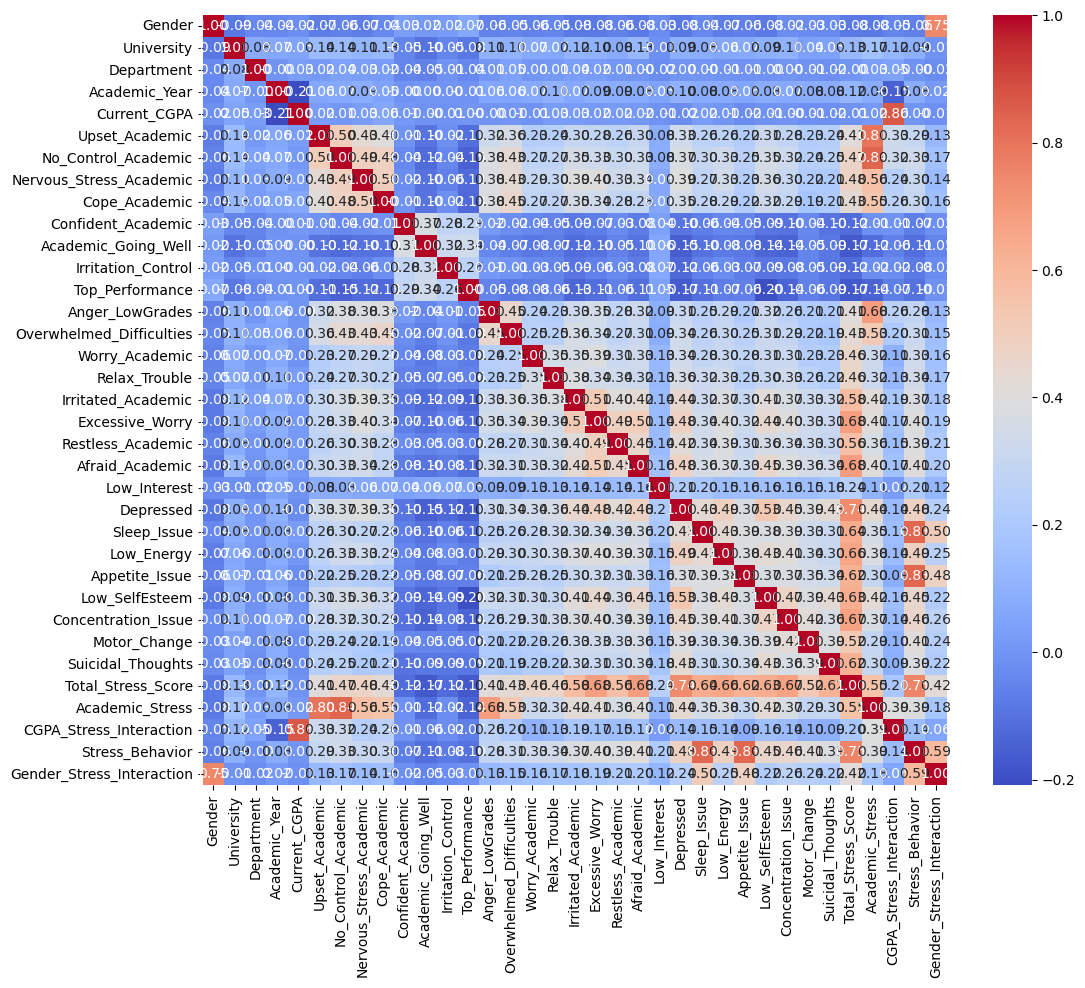

In [181]:
# Calculate the correlation matrix
corr_matrix = df_cleaned.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [134]:
# Save the updated dataset to a new CSV file
df_cleaned.to_csv('cleanedAndScledDataset.csv', index=False)

In [185]:
dfCleaned=pd.read_csv("cleanedAndScledDataset.csv")
dfCleaned.head(1)

University  Department  Academic_Year  Current_CGPA  Upset_Academic  \
0           9           3              4             0               4   

   No_Control_Academic  Nervous_Stress_Academic  Cope_Academic  \
0                    5                        3              2   

   Confident_Academic  Academic_Going_Well  ...  Appetite_Issue  \
0                   2                    1  ...             2.0   

   Low_SelfEsteem  Concentration_Issue  Motor_Change  Suicidal_Thoughts  \
0               2                  2.0             3                2.0   

   Total_Stress_Score  Academic_Stress  CGPA_Stress_Interaction  \
0                17.0               13                        0   

   Stress_Behavior  Gender_Stress_Interaction  
0              8.0                        8.0  

[1 rows x 34 columns]

In [189]:
dfCleaned['Age']

KeyError: 'Age'